In [1]:
# Basic packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For imbalance handling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\dhanu\Downloads\fraudTest_real.csv")

# View shape and first few rows
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (555719, 15)


,trans_date_trans_time,cc_num,merchant,category,amt,street,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,351 Darlene Green,Columbia,SC,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,3638 Marsh Union,Altonah,UT,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,9333 Valentine Point,Bellmore,NY,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,32941 Krystal Mill Apt. 552,Titusville,FL,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,5783 Evan Roads Apt. 465,Falmouth,MI,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [5]:
# Data types and nulls
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   street                 555719 non-null  object 
 6   city                   555719 non-null  object 
 7   state                  555719 non-null  object 
 8   lat                    555719 non-null  float64
 9   long                   555719 non-null  float64
 10  city_pop               555719 non-null  int64  
 11  unix_time              555719 non-null  int64  
 12  merch_lat              555719 non-null  float64
 13  merch_long             555719 non-null  float64
 14  is_fraud               555719 non-nu

In [7]:
# Basic statistics
df.describe(include='all')

,trans_date_trans_time,cc_num,merchant,category,amt,street,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,226976,NaN,693,14,NaN,924,849,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15-12-2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,444 Robert Mews,Birmingham,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1859,56370,NaN,1474,2423,40393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.178627e+17,NaN,NaN,69.392810,NaN,NaN,NaN,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,NaN,1.309920e+18,NaN,NaN,156.745941,NaN,NaN,NaN,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,NaN,1.800000e+14,NaN,NaN,9.630000,NaN,NaN,NaN,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,NaN,3.520000e+15,NaN,NaN,47.290000,NaN,NaN,NaN,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,NaN,4.640000e+15,NaN,NaN,83.010000,NaN,NaN,NaN,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000


Exploratory Data Analysis (EDA)

🎯 Objective:

Understand patterns in fraudulent vs. non-fraudulent transactions using visual analysis.

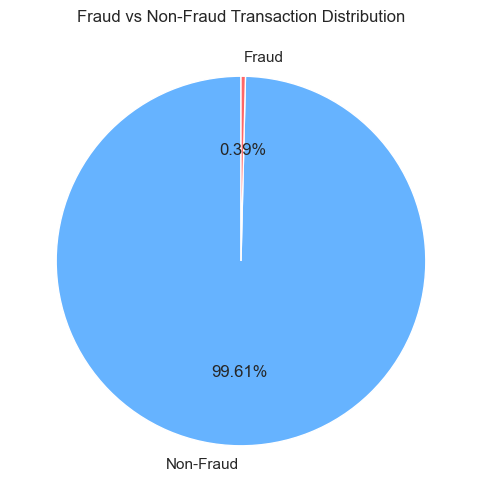

In [11]:
#Fraud vs Non-Fraud Distribution

# Check class balance
df['is_fraud'].value_counts()

# Pie chart
labels = ['Non-Fraud', 'Fraud']
sizes = df['is_fraud'].value_counts()
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.show()

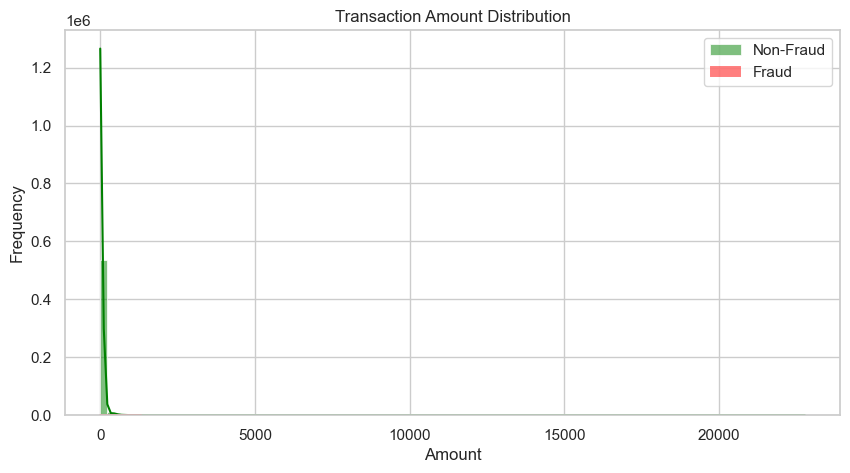

In [13]:
#Transaction Amount Distribution

plt.figure(figsize=(10,5))
sns.histplot(df[df['is_fraud'] == 0]['amt'], bins=100, label='Non-Fraud', color='green', kde=True)
sns.histplot(df[df['is_fraud'] == 1]['amt'], bins=100, label='Fraud', color='red', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

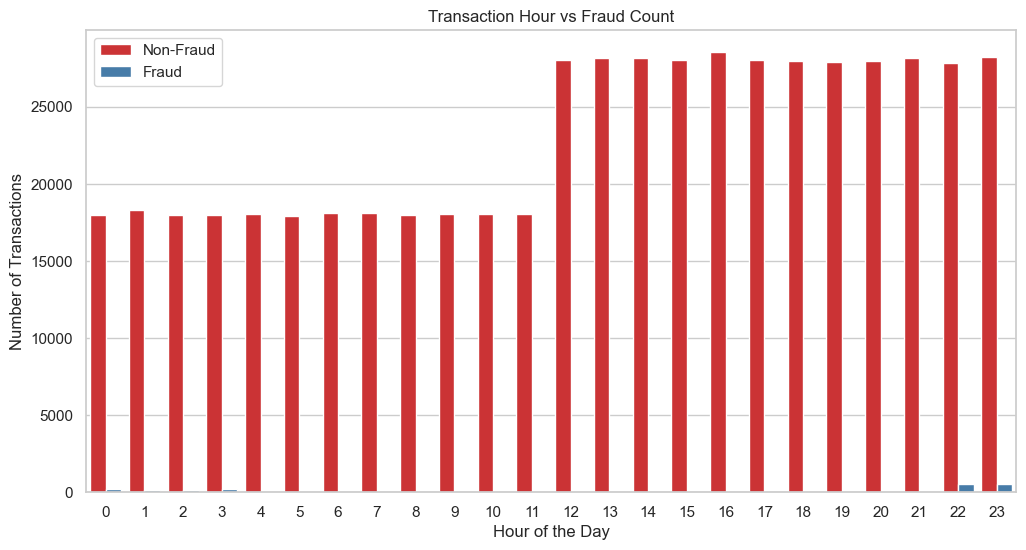

In [15]:
#Extract Hour from Time 

# Convert datetime column to datetime object
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract hour of transaction
df['hour'] = df['trans_date_trans_time'].dt.hour

# Fraud by hour
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df, hue='is_fraud', palette='Set1')
plt.title('Transaction Hour vs Fraud Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()


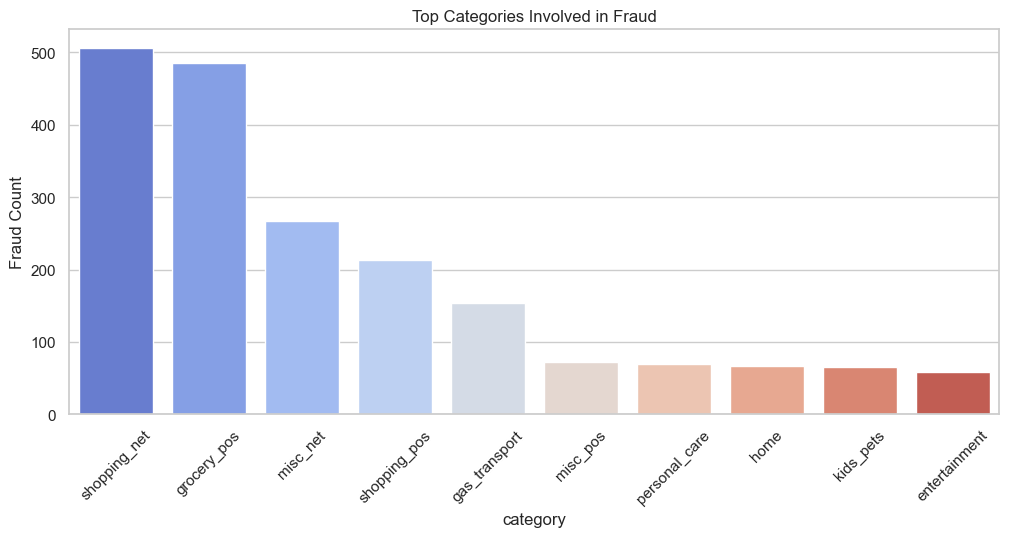

In [17]:
#Top Fraud Categories

plt.figure(figsize=(12,5))
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts().head(10)
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='coolwarm')
plt.title("Top Categories Involved in Fraud")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()

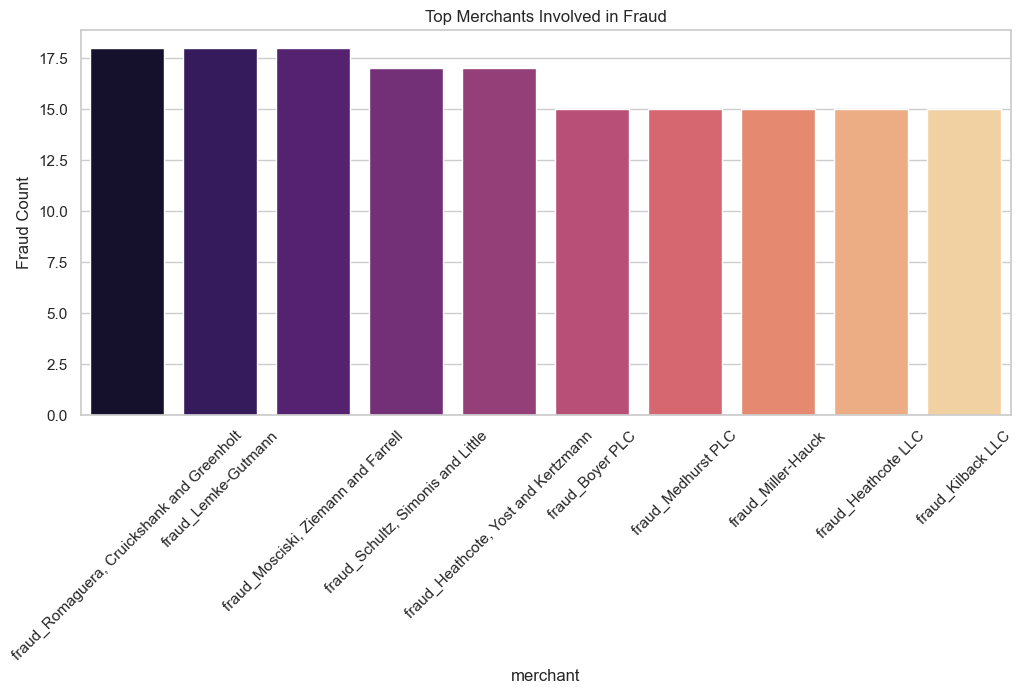

In [19]:
#Top Merchants Involved in Fraud

plt.figure(figsize=(12,5))
fraud_by_merchant = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)
sns.barplot(x=fraud_by_merchant.index, y=fraud_by_merchant.values, palette='magma')
plt.title("Top Merchants Involved in Fraud")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()

Feature Engineering

🎯 Objective:

Create meaningful new features and prepare data for modeling.

In [23]:
#Create Distance Between Customer and Merchant

#Use the Haversine formula to calculate distance based on latitude and longitude.

import math

def haversine(lat1, lon1, lat2, lon2):
    # Earth radius in km
    R = 6371.0
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat/2)*2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)*2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Create 'distance' column
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [25]:
#Extract More Date Features

df['day'] = df['trans_date_trans_time'].dt.day
df['weekday'] = df['trans_date_trans_time'].dt.weekday 
df['month'] = df['trans_date_trans_time'].dt.month


In [27]:
#Encode Categorical Variables

#Use LabelEncoder for simplicity

le = LabelEncoder()

for col in ['category', 'merchant', 'city', 'state', 'street']:
    df[col] = le.fit_transform(df[col])

In [29]:
#Scale Amount & Distance

scaler = StandardScaler()
df[['amt', 'distance']] = scaler.fit_transform(df[['amt', 'distance']])

In [31]:
#Final Feature Set

# Drop unused columns
df_model = df.drop(columns=['cc_num', 'trans_date_trans_time', 'unix_time'])  # not useful for model

# Define features (X) and target (y)
X = df_model.drop('is_fraud', axis=1)
y = df_model['is_fraud']

Handle Class Imbalance & Split the Data

🎯 Objective:

Handle the imbalance between fraud and non-fraud transactions and prepare clean data for training/testing.

In [33]:
# Check class distribution
y.value_counts(normalize=True) * 100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [35]:
#Train-Test Split

# Split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
nulls_train = X_train.isnull().sum()
print(nulls_train[nulls_train > 0])

distance    221777
dtype: int64


In [41]:
# Impute missing distance with median
median_distance = X_train['distance'].median()

X_train['distance'].fillna(median_distance, inplace=True)
X_test['distance'].fillna(median_distance, inplace=True)

In [43]:
#SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Model Building & Evaluation

🎯 Objective:

Train multiple models and compare performance, especially on detecting fraudulent transactions.

In [47]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_lr = lr.predict(X_test)

In [49]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

In [61]:
#XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    print("\n" + "-"*40)

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Logistic Regression ---
Confusion Matrix:
 [[103884   6831]
 [   117    312]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    110715
           1       0.04      0.73      0.08       429

    accuracy                           0.94    111144
   macro avg       0.52      0.83      0.53    111144
weighted avg       1.00      0.94      0.96    111144

ROC-AUC Score: 0.8327868852459016

----------------------------------------
--- Random Forest ---
Confusion Matrix:
 [[110421    294]
 [   120    309]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.51      0.72      0.60       429

    accuracy                           1.00    111144
   macro avg       0.76      0.86      0.80    111144
weighted avg       1.00      1.00      1.00    111144

ROC-AUC Score: 0.8588121267703981

---------------------------

In [75]:
import joblib

# Save model to file
joblib.dump(xgb, 'fraud_detector_model.pkl')


joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']